In [1]:
%load_ext autoreload
%autoreload 2

# Comet Import and Setup

In [2]:
# Import comet_ml at the top of your file, before sklearn!
from comet_ml import Experiment
import os 

# Create an experiment with your api key
comet_exp = Experiment(
    api_key=os.environ.get('COMET_API_KEY'),  # don’t hardcode!!
    project_name="milestone_2",
    workspace="morph-e",
    log_code=True,
)

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/morph-e/milestone-2/73a26054a1404e8c88aec7f43447a44a



# Imports

In [3]:
#classic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

#project imports
from ift6758.features.feature_engineering1 import SeasonDataSet
from ift6758.metrics import plot_metrics

#sk-learn imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

#keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, preprocessing, activations

In [4]:
#comet imports
from comet_ml import Experiment

# DATA LOADING

In [5]:
train_years = [2015,2016,2017,2018]
test_years=[2019]

In [6]:
train_dataset = SeasonDataSet(train_years)
train_df = train_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2015_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2015_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2016_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2017_period_info.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2018_period_info.pkl


In [7]:
test_dataset = SeasonDataSet(test_years)
test_df = test_dataset.get_tidy_data()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2019_period_info.pkl


In [8]:
features = ["distanceNet","angleNet"]
label_column = "isGoal"

In [9]:
train_df

,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie,goalCoordinates,isGoal,distanceNet,angleNet
0,Shot,2015020001,Toronto Maple Leafs,1,00:51,REGULAR,19:09,-55.0,6.0,Wrist Shot,0,NaN,Brad Boyes,Carey Price,"(-89, 0)",0,34.525353,10.007980
1,Shot,2015020001,Toronto Maple Leafs,1,01:05,REGULAR,18:55,-79.0,0.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,10.000000,0.000000
2,Shot,2015020001,Toronto Maple Leafs,1,01:06,REGULAR,18:54,-75.0,-1.0,Snap Shot,0,NaN,Nazem Kadri,Carey Price,"(-89, 0)",0,14.035669,-4.085617
3,Shot,2015020001,Toronto Maple Leafs,1,01:53,REGULAR,18:07,-55.0,-36.0,Wrist Shot,0,NaN,Daniel Winnik,Carey Price,"(-89, 0)",0,49.517674,-46.636577
4,Shot,2015020001,Toronto Maple Leafs,1,02:37,REGULAR,17:23,-61.0,-1.0,Tip-In,0,NaN,Joffrey Lupul,Carey Price,"(-89, 0)",0,28.017851,-2.045408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343354,Goal,2018030417,St. Louis Blues,3,15:22,REGULAR,04:38,-77.0,7.0,Snap Shot,0,Even,Zach Sanford,Tuukka Rask,"(-89, 0)",1,13.892444,30.256437
343355,Shot,2018030417,St. Louis Blues,3,15:51,REGULAR,04:09,-69.0,7.0,Snap Shot,0,NaN,Alexander Steen,Tuukka Rask,"(-89, 0)",0,21.189620,19.290046
343356,Shot,2018030417,St. Louis Blues,3,15:55,REGULAR,04:05,-65.0,-4.0,Snap Shot,0,NaN,Ryan O'Reilly,Tuukka Rask,"(-89, 0)",0,24.331050,-9.462322
343357,Shot,2018030417,Boston Bruins,3,16:50,REGULAR,03:10,42.0,3.0,Wrist Shot,0,NaN,Marcus Johansson,Jordan Binnington,"(89, 0)",0,47.095647,-3.652223


In [10]:
train_df = train_df[['distanceNet', 'angleNet', 'isGoal']]
test_df = test_df[['distanceNet', 'angleNet', 'isGoal']]
train_df, test_df

(        distanceNet   angleNet  isGoal
 0         34.525353  10.007980       0
 1         10.000000   0.000000       0
 2         14.035669  -4.085617       0
 3         49.517674 -46.636577       0
 4         28.017851  -2.045408       0
 ...             ...        ...     ...
 343354    13.892444  30.256437       1
 343355    21.189620  19.290046       0
 343356    24.331050  -9.462322       0
 343357    47.095647  -3.652223       0
 343358    51.000000 -28.072487       1
 
 [343339 rows x 3 columns],
        distanceNet   angleNet  isGoal
 0         4.123106  14.036243       1
 1        57.035077  -2.009554       0
 2        26.683328  12.994617       0
 3        36.055513 -33.690068       0
 4        55.226805 -31.675469       0
 ...            ...        ...     ...
 76615   149.933319   9.211027       0
 76616   170.026469  -1.010997       0
 76617   123.146255  -2.792702       0
 76618   120.415946   4.763642       0
 76619   166.000000   0.000000       0
 
 [76619 rows x 3 col

# Some EDA

In [11]:
# Get weather type counts
label_dict = {0: 'Shots',
              1: 'Goals'
             }

label_list = list(label_dict.values())

class_counts = [train_df.isGoal.value_counts()[i] for i in range(0,2)]

label_counts = sorted(list(zip(label_list, class_counts)), 
                     key=lambda x:x[1], reverse=True)

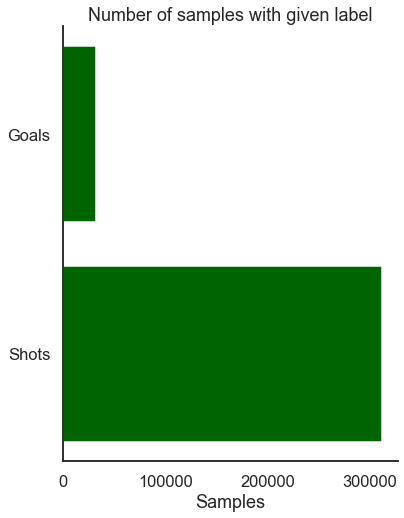

In [12]:
# Plot weather type counts
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(6,8))
plt.barh(width=[x[1] for x in label_counts], 
         y=[x[0] for x in label_counts], 
         color='darkgreen')
plt.yticks(ticks=list(range(0,2)), labels=[x[0] for x in label_counts])
plt.xlabel('Samples')
plt.title('Number of samples with given label')
sns.despine()
plt.show();

In [13]:
train_df.isGoal.value_counts()

0    311215
1     32124
Name: isGoal, dtype: int64

# Generate Train and Validation Splits

In [14]:
X = train_df.drop('isGoal', axis=1)
Y = train_df['isGoal']
testX = test_df.drop('isGoal', axis=1)
testY = test_df['isGoal']
X, Y, testX, testY

(        distanceNet   angleNet
 0         34.525353  10.007980
 1         10.000000   0.000000
 2         14.035669  -4.085617
 3         49.517674 -46.636577
 4         28.017851  -2.045408
 ...             ...        ...
 343354    13.892444  30.256437
 343355    21.189620  19.290046
 343356    24.331050  -9.462322
 343357    47.095647  -3.652223
 343358    51.000000 -28.072487
 
 [343339 rows x 2 columns],
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 343354    1
 343355    0
 343356    0
 343357    0
 343358    1
 Name: isGoal, Length: 343339, dtype: int64,
        distanceNet   angleNet
 0         4.123106  14.036243
 1        57.035077  -2.009554
 2        26.683328  12.994617
 3        36.055513 -33.690068
 4        55.226805 -31.675469
 ...            ...        ...
 76615   149.933319   9.211027
 76616   170.026469  -1.010997
 76617   123.146255  -2.792702
 76618   120.415946   4.763642
 76619   166.000000   0.000000
 
 [76619 rows x 2 columns

In [15]:
trainX, valX, trainY, valY = train_test_split(X, Y, test_size=0.20, stratify=Y) #80-20 Split
trainX, valX, trainY, valY

(        distanceNet   angleNet
 206722    37.013511  51.581945
 143038   130.391718  -8.378673
 28061     30.000000  53.130102
 87240     59.093147 -23.962489
 141245   142.555252  -8.471145
 ...             ...        ...
 6564      21.587033  13.392498
 23777     21.931712  24.227745
 336314    14.560220 -15.945396
 73500     33.941125  45.000000
 206948    22.022716  39.472460
 
 [274671 rows x 2 columns],
         distanceNet   angleNet
 284126    10.198039 -11.309932
 105690    66.887966 -31.551385
 43653      7.615773 -23.198591
 71602     29.154759 -22.166346
 118954    23.086793 -17.650124
 ...             ...        ...
 321320    22.022716 -39.472460
 270873    29.410882 -17.818889
 26585     13.341664 -12.994617
 1690      55.785303 -14.534455
 189330    19.026298   3.012788
 
 [68668 rows x 2 columns],
 206722    0
 143038    0
 28061     0
 87240     0
 141245    0
          ..
 6564      0
 23777     0
 336314    1
 73500     0
 206948    0
 Name: isGoal, Length: 274671,

In [16]:
# Save raw copies of train and validation sets before further preprocessing
X_train_raw = trainX.copy()
y_train_raw = trainY.copy()

X_val_raw = valX.copy()
y_val_raw = valY.copy()

In [17]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(trainX)
X_scaled = pd.DataFrame(X_scaled)
X_scaled

,0,1
0,0.195162,0.635041
1,0.687521,0.464635
2,0.158182,0.639441
3,0.311582,0.420347
4,0.751656,0.464373
...,...,...
274666,0.113823,0.526508
274667,0.115640,0.557302
274668,0.076772,0.443131
274669,0.178963,0.616335


In [18]:
# Check the results
X_scaled.describe()

,0,1
count,274671.000000,274671.000000
mean,0.211585,0.490905
std,0.171422,0.102700
min,0.000000,0.000000
25%,0.093433,0.412950
50%,0.181431,0.488447
75%,0.270199,0.568048
max,1.000000,1.000000


In [19]:
# Build a pipeline for the preprocessing steps
pipe_prepro = Pipeline([('scaler', MinMaxScaler())])

# Fit the pipeline and transform the training dataset
X_train_trans = pipe_prepro.fit_transform(trainX)
# Use the pipeline to transform the validation and test datasets
X_val_trans = pipe_prepro.transform(valX)
X_test_trans = pipe_prepro.transform(testX)

# Some Helper Functions

In [20]:
# Define a function to print selected model metrics
def print_metrics(y_true, y_pred):
    '''Print accuracy score, confusion matrix, and classification report.
    
    Keyword arguments:
    y_true: groud-truth labels
    y_pred: predicted labels
    
    Dependencies: 
    sklearn.metrics.accuracy_score
    sklearn.metrics.confusion_matrix
    sklearn.metrics.classification_report
    '''
    acc_score = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print('Accuracy:', acc_score)
    print('-------')
    print('Confusion matrix:')
    print(conf_matrix)
    print('-------')
    print('Classification report:')
    print(class_report)
    
# Define a function to make the ROC-AUC Curves
def roc_it(y_true, y_pred, model_name, figsize=(12,10)):
    '''Plot ROC with a separate curve for each class.
    
        Keyword arguments:
    y_true: ground-truth labels
    y_pred: predicted labels
    model_name: name to print in the plot title
    
    Dependencies:
    pandas aliased as pd
    sklearn.metrics.roc_curve
    sklearn.metrics.auc
    matplotlib.pyplot aliased as plt
    '''
    y_true_dum = pd.get_dummies(y_true)
    y_pred_dum = pd.get_dummies(y_pred)
    n_classes = y_true.nunique()
    
    fprs = []
    tprs = []
    aucs = []

    for i in range(0,n_classes-1):
        fpr, tpr, _ = roc_curve(y_true_dum.loc[:,i], y_pred_dum.loc[:,i])
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(round(auc(fpr, tpr),2))
        
    plt.figure(figsize=(12,10))
    for i in range(0, n_classes-1):
        plt.plot(fprs[i], tprs[i], label='Class: {}, AUC: {}'.format(i, 
                                                                     aucs[i]))
    plt.plot([0.0,1.0], [0.0,1.0], linestyle='--')
    plt.title('ROC curves by class for {}'.format(model_name))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

# Neural Network with KERAS

In [21]:
# convert to tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train_trans, trainY))
val_ds = tf.data.Dataset.from_tensor_slices((X_val_trans, valY))

In [22]:
for inputs, targets in train_ds.take(2):
    print ('Data: {}, Target: {}'.format(inputs, targets))
    print()

Data: [0.19516238 0.63504109], Target: 0

Data: [0.68752077 0.46463544], Target: 0



In [23]:
print(train_ds.cardinality().numpy())

274671


In [24]:
print(val_ds.cardinality().numpy())

68668


In [25]:
BATCH_SIZE = 2048

train_ds = train_ds.shuffle(buffer_size=1000)
train_ds = train_ds.batch(BATCH_SIZE)

val_ds = val_ds.shuffle(buffer_size=1000)
val_ds = val_ds.batch(BATCH_SIZE)

for inputs, targets in train_ds.take(3):
    print('Data: ', inputs.numpy()[:3])
    print('Target: ', targets.numpy()[:3])
    print()

Data:  [[0.92001267 0.50059036]
 [0.17685286 0.51773325]
 [0.15676964 0.43259192]]
Target:  [0 0 0]

Data:  [[0.04251014 0.31720468]
 [0.08518362 0.42648857]
 [0.75139689 0.50217515]]
Target:  [0 1 0]

Data:  [[0.71259973 0.45323298]
 [0.16036393 0.25956247]
 [0.10870018 0.44855685]]
Target:  [0 0 1]



In [26]:
def build_model():
    
    model = keras.models.Sequential()
    
    #Input Layer
    model.add(layers.InputLayer(input_shape=(2,)))
    
    # first fc layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))
      
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    # Last fc layer 
    # We choose the activation method as a sigmoid to get an output ranging between [0, 1]
    model.add(layers.Dense(1, activation='sigmoid', name='target'))
    
    return model

In [27]:
#build model
model = build_model()

# Compile The model
LEARNING_RATE = 1e-2

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
          loss = keras.losses.BinaryCrossentropy(from_logits=False),
          metrics = [keras.metrics.BinaryAccuracy()])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [28]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
EPOCHS = 10

In [29]:
#these will all get logged
params={'batch_size':BATCH_SIZE,
        'epochs':EPOCHS,
        'layer1_num':512,
        'optimizer':'adam',
        'learning_rate':LEARNING_RATE
}

In [30]:
#will log metrics with the prefix 'train_'
with comet_exp.train():
    history = model.fit(x=train_ds,
                        epochs=EPOCHS,
                        validation_data=val_ds,
                        callbacks=[stop_early])

COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/10
8584/8584 [==============================] - 47s 5ms/step - loss: 0.3124 - binary_accuracy: 0.9064 - val_loss: 0.3107 - val_binary_accuracy: 0.9064
Epoch 2/10
8584/8584 [==============================] - 45s 5ms/step - loss: 0.3108 - binary_accuracy: 0.9064 - val_loss: 0.3108 - val_binary_accuracy: 0.9064
Epoch 3/10
8584/8584 [==============================] - 44s 5ms/step - loss: 0.3108 - binary_accuracy: 0.9064 - val_loss: 0.3108 - val_binary_accuracy: 0.9064
Epoch 4/10
8584/8584 [==============================] - 43s 5ms/step - loss: 0.3108 - binary_accuracy: 0.9064 - val_loss: 0.3108 - val_binary_accuracy: 0.9064
Epoch 00004: early stopping


In [32]:
model.metrics_names

['loss', 'binary_accuracy']

In [33]:
# loss, score_loss, price_loss, score_rmse, price_rmse= model.evaluate(test_ds)

# print("Test Loss: ", loss)
# print("Test Score Loss: ", score_loss)
# print("Test Price Loss: ", price_loss)
# print("Test Score Root Mean Squared Error: ", score_rmse)
# print("Test Price Root Mean Squared Error: ", price_rmse)

In [34]:
val_pred = model.predict(val_ds, verbose=1)

2146/2146 [==============================] - 4s 2ms/step


In [35]:
val_pred

array([[0.09783998],
       [0.09783998],
       [0.09783998],
       ...,
       [0.09783998],
       [0.09783998],
       [0.09783998]], dtype=float32)

In [36]:
threshold = 0.5
val_pred = np.where(val_pred > threshold, 1,0)

In [37]:
val_pred = np.concatenate([y for y in val_pred], axis=0)

In [44]:
val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
val_y_true = np.concatenate([y for x, y in val_ds], axis=0)

In [42]:
val_y_true

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Plot ROC curve for each class
roc_it(valY, val_pred, 'Neural Network 2-f')

# Prepare for Comet Logs

In [ ]:
#will log metrics with the prefix 'test_'
# with experiment.test():
#     loss, accuracy = model.evaluate(x_test, y_test)
#     metrics = {
#         'loss':loss,
#         'accuracy':accuracy
#     }
#     experiment.log_metrics(metrics)

In [ ]:
comet_exp.log_parameters(params)